In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Уровень значимости для статистических тестов (вынесено, чтобы избежать магических значений)
ALPHA = 0.05

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

x    float64
y    float64
dtype: object


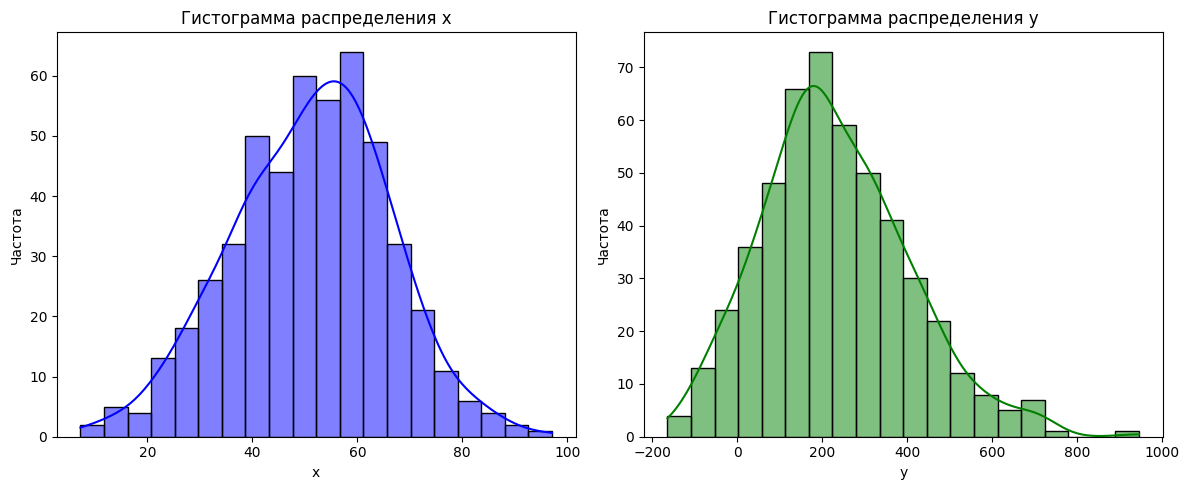

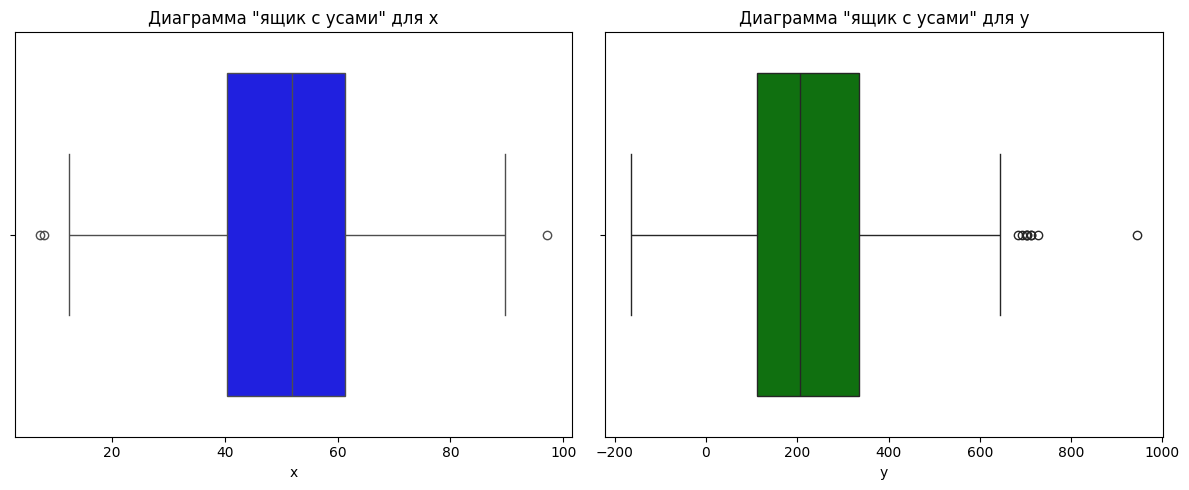

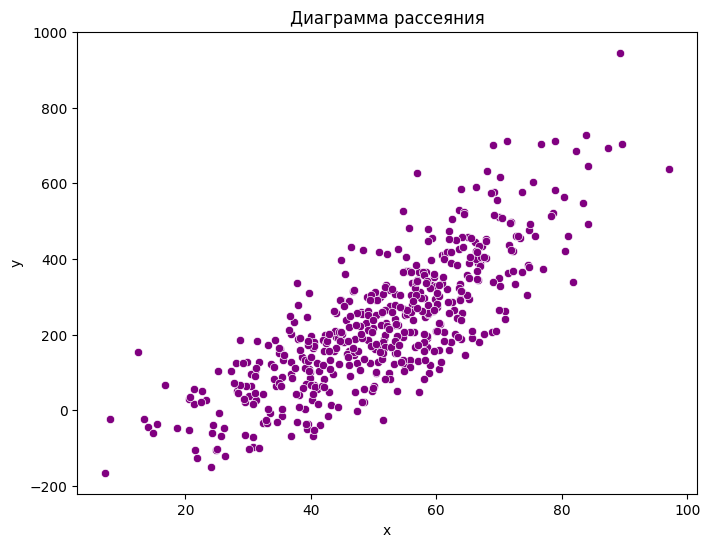

Корреляция Пирсона между x и y: 0.8032
Сильная линейная зависимость между x и y.
На основе гистограмм, диаграмм "ящик с усами" и диаграммы рассеяния:
Распределение данных для x и y относительно симметрично, коэффициент корреляции Пирсона может быть подходящим.


In [181]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков


# Считывание файла
df1 = pd.read_csv('ex1.csv')

# Проверка типов данных
print(df1.dtypes)

# Построение гистограмм распределения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1['x'], kde=True, bins=20, color='blue')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(df1['y'], kde=True, bins=20, color='green')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Построение диаграмм "ящик с усами"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['x'], color='blue')
plt.title('Диаграмма "ящик с усами" для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['y'], color='green')
plt.title('Диаграмма "ящик с усами" для y')

plt.tight_layout()
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1['x'], y=df1['y'], color='purple')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Анализ целесообразности использования корреляции Пирсона
correlation = df1['x'].corr(df1['y'])
print(f'Корреляция Пирсона между x и y: {correlation:.4f}')

# Вывод
if abs(correlation) > 0.7:
    print('Сильная линейная зависимость между x и y.')
elif 0.5 < abs(correlation) <= 0.7:
    print('Умеренная линейная зависимость между x и y.')
elif 0.3 < abs(correlation) <= 0.5:
    print('Слабая линейная зависимость между x и y.')
else:
    print('Очень слабая или отсутствующая линейная зависимость между x и y.')

# Визуальный анализ
print('На основе гистограмм, диаграмм "ящик с усами" и диаграммы рассеяния:')
if df1['x'].skew() > 1 or df1['y'].skew() > 1:
    print('Распределение данных для x или y имеет заметное смещение, это может повлиять на применимость коэффициента корреляции Пирсона.')
else:
    print('Распределение данных для x и y относительно симметрично, коэффициент корреляции Пирсона может быть подходящим.')

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [182]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 


# считывание файла
df2 = pd.read_csv('ex2.csv') 

# Расчет коэффициента корреляции Пирсона
correlation = df2['x'].corr(df2['y'])

# Расчет p-значения
correlation, p_value = sc.stats.pearsonr(df2['x'], df2['y'])

# Расчет t-критерия
n = len(df2)
t_value = correlation * np.sqrt((n - 2) / (1 - correlation**2))

# Определение табличного значения t-критерия
df = n - 2  # Степени свободы
t_critical = sc.stats.t.ppf(1 - ALPHA / 2, df)

# Вывод результатов
print(f'Коэффициент корреляции Пирсона: {correlation:.4f}')
print(f'P-значение: {p_value:.4f}')
print(f'T-критерий: {t_value:.4f}')
print(f'Табличное значение t-критерия для {df} степеней свободы: {t_critical:.4f}')

# Вывод о степени корреляции и статистической значимости
if abs(correlation) > 0.7:
    correlation_strength = 'сильная'
elif 0.5 < abs(correlation) <= 0.7:
    correlation_strength = 'умеренная'
elif 0.3 < abs(correlation) <= 0.5:
    correlation_strength = 'слабая'
else:
    correlation_strength = 'очень слабая или отсутствующая'

if p_value < ALPHA:
    significance = 'статистически значима'
else:
    significance = 'не является статистически значимой'

if abs(t_value) > t_critical:
    t_significance = 'статистически значима'
else:
    t_significance = 'не является статистически значимой'

print(f'Корреляция между x и y: {correlation_strength}, {significance} (p < {ALPHA}).')
print(f'По t-критерию, корреляция: {t_significance} (|t| > {t_critical:.4f}).')

Коэффициент корреляции Пирсона: 0.7333
P-значение: 0.0000
T-критерий: 24.0712
Табличное значение t-критерия для 498 степеней свободы: 1.9647
Корреляция между x и y: сильная, статистически значима (p < 0.05).
По t-критерию, корреляция: статистически значима (|t| > 1.9647).


x    float64
y    float64
dtype: object


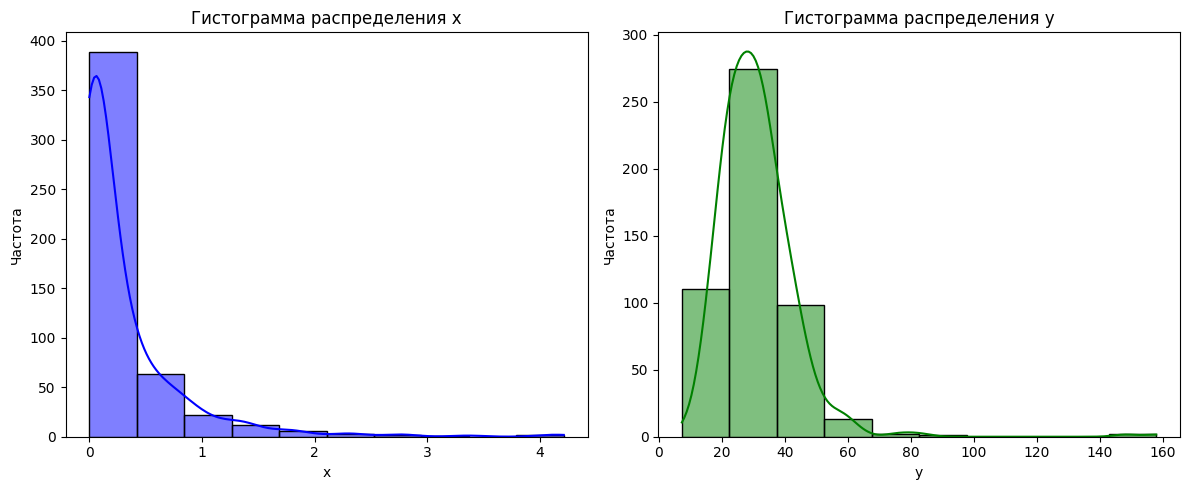

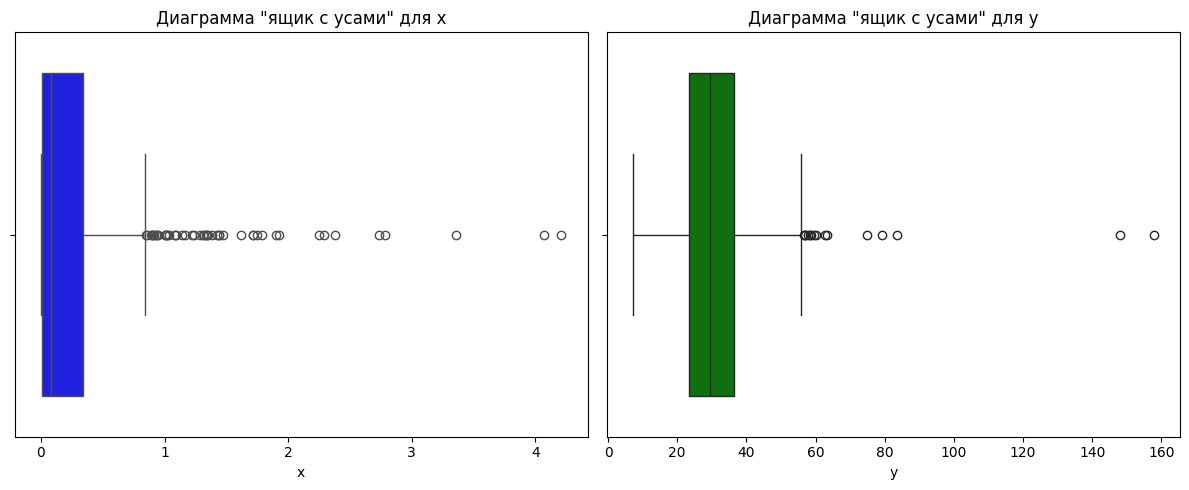

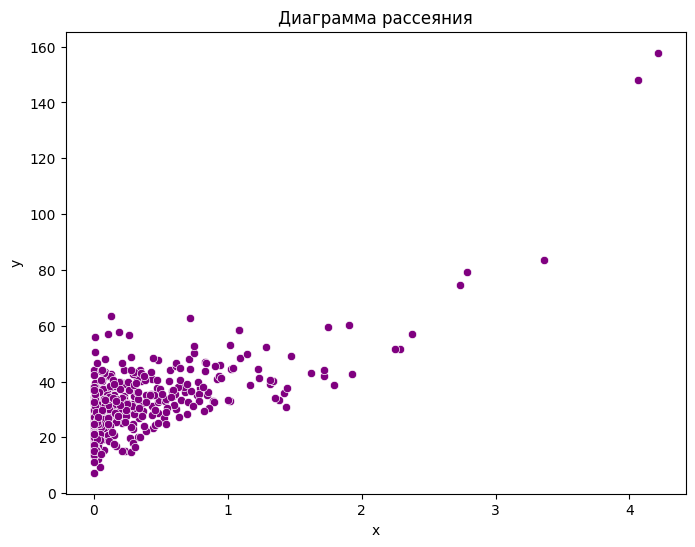

Анализ предшествующих графиков:
P-значение для нормальности распределения x: 0.0000
P-значение для нормальности распределения y: 0.0000
Распределения данных для x или y не являются нормальными. Рекомендуется использовать корреляцию Спирмена.
Наличие выбросов в данных. Рекомендуется использовать корреляцию Спирмена.
Сильная линейная зависимость. Можно использовать корреляцию Пирсона.


In [183]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


# Проверка типов данных
print(df2.dtypes)

# Построение гистограмм распределения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df2['x'], kde=True, bins=10, color='blue')
plt.title('Гистограмма распределения x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(df2['y'], kde=True, bins=10, color='green')
plt.title('Гистограмма распределения y')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['x'], color='blue')
plt.title('Диаграмма "ящик с усами" для x')

plt.subplot(1, 2, 2)
sns.boxplot(x=df2['y'], color='green')
plt.title('Диаграмма "ящик с усами" для y')

plt.tight_layout()
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['x'], y=df2['y'], color='purple')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Вывод о целесообразности использования корреляции Спирмена
print("Анализ предшествующих графиков:")

# Проверка нормальности распределения
normality_x = sc.stats.shapiro(df2['x']).pvalue
normality_y = sc.stats.shapiro(df2['y']).pvalue

print(f'P-значение для нормальности распределения x: {normality_x:.4f}')
print(f'P-значение для нормальности распределения y: {normality_y:.4f}')

if normality_x < ALPHA or normality_y < ALPHA:
    print('Распределения данных для x или y не являются нормальными. Рекомендуется использовать корреляцию Спирмена.')
else:
    print('Распределения данных для x и y являются нормальными. Можно использовать корреляцию Пирсона.')

# Проверка наличия выбросов
outliers_x = df2['x'].quantile(0.75) + 1.5 * (df2['x'].quantile(0.75) - df2['x'].quantile(0.25))
outliers_y = df2['y'].quantile(0.75) + 1.5 * (df2['y'].quantile(0.75) - df2['y'].quantile(0.25))

if df2['x'].max() > outliers_x or df2['y'].max() > outliers_y:
    print('Наличие выбросов в данных. Рекомендуется использовать корреляцию Спирмена.')
else:
    print('В данных нет явных выбросов. Можно использовать корреляцию Пирсона.')

# Проверка линейности зависимости
if df2['x'].corr(df2['y']) > 0.7:
    print('Сильная линейная зависимость. Можно использовать корреляцию Пирсона.')
else:
    print('Слабая или отсутствующая линейная зависимость. Рекомендуется использовать корреляцию Спирмена.')

In [184]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 

# Вычисление корреляции Спирмена
spearman_corr, spearman_p_value = sc.stats.spearmanr(df2['x'], df2['y'])
print(f'Корреляция Спирмена: {spearman_corr:.4f}')
print(f'P-значение для корреляции Спирмена: {spearman_p_value:.4f}')

# Вывод о целесообразности использования корреляции Спирмена
if spearman_p_value < ALPHA: 
    print(f'Корреляция Спирмена статистически значима (p < {ALPHA}).')
else:
    print(f'Корреляция Спирмена не является статистически значимой (p >= {ALPHA}).')

# Расчет t-критерия для корреляции Спирмена
n = len(df2)
t_value = spearman_corr * np.sqrt((n - 2) / (1 - spearman_corr**2))

# Определение табличного значения t-критерия
alpha = 0.05
df = n - 2  # Степени свободы
t_critical = sc.stats.t.ppf(1 - alpha / 2, df)

# Вывод результатов t-критерия
print(f'T-критерий: {t_value:.4f}')
print(f'Табличное значение t-критерия для {df} степеней свободы: {t_critical:.4f}')
    
if abs(spearman_corr) < 0.3:
    correlation_strength = "Слабая"
elif abs(spearman_corr) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({spearman_corr:.4f})")

Корреляция Спирмена: 0.6171
P-значение для корреляции Спирмена: 0.0000
Корреляция Спирмена статистически значима (p < 0.05).
T-критерий: 17.5002
Табличное значение t-критерия для 498 степеней свободы: 1.9647
Степень корреляции: Умеренная (0.6171)


Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [185]:
# считывание файла
df3 = pd.read_csv('ex3.csv') 

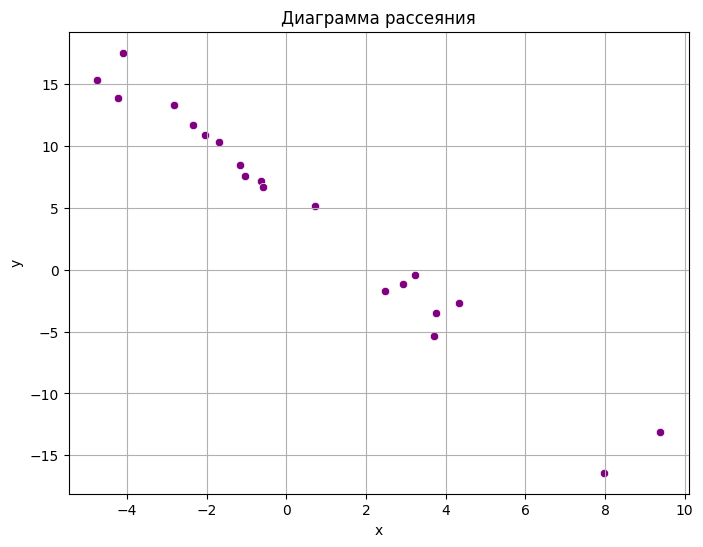

Анализ диаграммы рассеяния:
Наблюдается сильная линейная зависимость. Можно использовать корреляцию Пирсона.
Коэффициент корреляции Пирсона: -0.9851
P-значение для корреляции Пирсона: 0.0000
Корреляция Пирсона статистически значима (p < 0.05).
Степень корреляции: Сильная


In [186]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона

# расчет коэффициента Пирсона

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df3['x'], y=df3['y'], color='purple')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Вывод о целесообразности использования корреляции Пирсона
print("Анализ диаграммы рассеяния:")

# Проверка наличия линейной зависимости
if abs(df3['x'].corr(df3['y'])) > 0.7:
    print('Наблюдается сильная линейная зависимость. Можно использовать корреляцию Пирсона.')
else:
    print('Наблюдается слабая или отсутствующая линейная зависимость. Рекомендуется использовать корреляцию Спирмена.')

# Рассчитан коэффициент корреляции Пирсона
pearson_corr, pearson_p_value = sc.stats.pearsonr(df3['x'], df3['y'])
print(f'Коэффициент корреляции Пирсона: {pearson_corr:.4f}')
print(f'P-значение для корреляции Пирсона: {pearson_p_value:.4f}')

# Вывод о статистической значимости корреляции Пирсона
alpha = 0.05
if pearson_p_value < alpha:
    print('Корреляция Пирсона статистически значима (p < 0.05).')
else:
    print('Корреляция Пирсона не является статистически значимой (p >= 0.05).')

# Вывод о степени корреляции
if abs(pearson_corr) < 0.3:
    correlation_strength = "Слабая"
elif abs(pearson_corr) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength}")


Коэффициенты линейной регрессии:
Пересечение (intercept): 5.7408
Наклон (slope): -2.3391


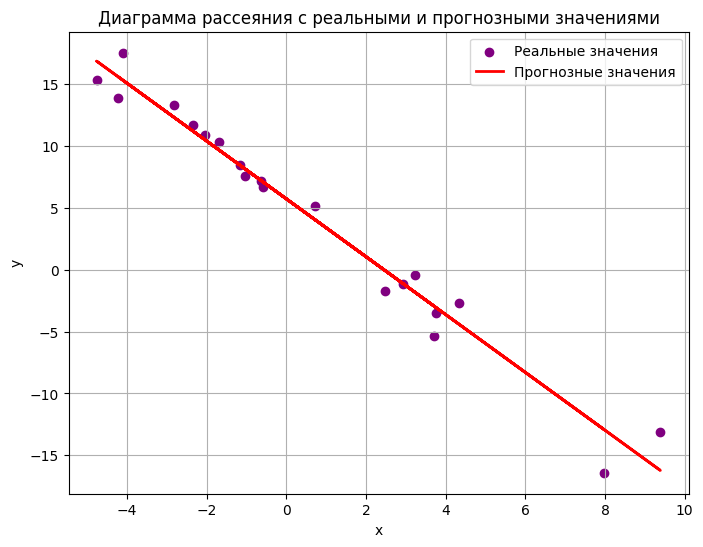

In [187]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике

# Расчет коэффициентов линейной регрессии
X = df3['x'].values.reshape(-1, 1)
y = df3['y'].values

# Добавляем константу (пересечение)
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X).fit()

# Прогнозные значения
y_pred = model.predict(X)

# Коэффициенты линейной регрессии
intercept = model.params[0]
slope = model.params[1]

print(f'Коэффициенты линейной регрессии:')
print(f'Пересечение (intercept): {intercept:.4f}')
print(f'Наклон (slope): {slope:.4f}')

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df3['x'], df3['y'], color='purple', label='Реальные значения')
plt.plot(df3['x'], y_pred, color='red', label='Прогнозные значения', linewidth=2)
plt.title('Диаграмма рассеяния с реальными и прогнозными значениями')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [188]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации

# Вычисляем среднюю ошибку аппроксимации (MAE) вручную
mae = np.mean(np.abs((y - y_pred) / y) ) * 100

print(f'Средняя ошибка аппроксимации (MAE): {mae:.2f}%')

Средняя ошибка аппроксимации (MAE): 35.26%


In [189]:
# КРИТЕРИЙ 8

# расчет F-критерия

# вывод о статистической значимости уравнения в целом

# Печатаем сводку модели, включая F-критерий и p-значение
print(model.summary())

# Извлечение F-критерия и p-значения
f_value = model.fvalue
f_p_value = model.f_pvalue

# Вывод F-критерия и p-значения
print(f'F-критерий: {f_value:.4f}')
print(f'P-значение для F-критерия: {f_p_value:.4f}')

# Вывод о статистической значимости уравнения в целом
if f_p_value < ALPHA:
    print(f'Уравнение линейной регрессии статистически значимо (p < {ALPHA}).')
else:
    print(f'Уравнение линейной регрессии не является статистически значимым (p >= {ALPHA}).')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     592.3
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.18e-15
Time:                        21:29:28   Log-Likelihood:                -37.403
No. Observations:                  20   AIC:                             78.81
Df Residuals:                      18   BIC:                             80.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7408      0.376     15.288      0.0

In [190]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции

# вывод о статистической значимости коэффициентов регрессии

# запись диапазона коэффицентов регрессии


# Извлечение коэффициентов, стандартных ошибок, t-критериев и p-значений
coefficients = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues

# Вывод коэффициентов и их стандартных ошибок
print("\nКоэффициенты и их стандартные ошибки:")
for i, (coef, std_err) in enumerate(zip(coefficients, std_errors)):
    print(f'Коэффициент {i}: {coef:.4f}, Стандартная ошибка: {std_err:.4f}')

# Вывод t-критериев и p-значений
print("\nT-критерии и p-значения:")
for i, (t_val, p_val) in enumerate(zip(t_values, p_values)):
    print(f'T-критерий {i}: {t_val:.4f}, P-значение: {p_val:.4f}')

# Вывод о статистической значимости коэффициентов регрессии

print("\nВывод о статистической значимости коэффициентов регрессии:")
for i, (coef, p_val) in enumerate(zip(coefficients, p_values)):
    if p_val < ALPHA:
        print(f'Коэффициент {i} статистически значим (p < {ALPHA}).')
    else:
        print(f'Коэффициент {i} не является статистически значимым (p >= {ALPHA}).')

# Запись диапазона коэффициентов регрессии
confidence_intervals = model.conf_int(alpha=ALPHA)
print("\nДиапазон коэффициентов регрессии (95% доверительный интервал):")
for i, (lower, upper) in enumerate(confidence_intervals):
    print(f'Коэффициент {i}: [{lower:.4f}, {upper:.4f}]')



Коэффициенты и их стандартные ошибки:
Коэффициент 0: 5.7408, Стандартная ошибка: 0.3755
Коэффициент 1: -2.3391, Стандартная ошибка: 0.0961

T-критерии и p-значения:
T-критерий 0: 15.2879, P-значение: 0.0000
T-критерий 1: -24.3364, P-значение: 0.0000

Вывод о статистической значимости коэффициентов регрессии:
Коэффициент 0 статистически значим (p < 0.05).
Коэффициент 1 статистически значим (p < 0.05).

Диапазон коэффициентов регрессии (95% доверительный интервал):
Коэффициент 0: [4.9518, 6.5297]
Коэффициент 1: [-2.5411, -2.1372]


In [191]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6

X_new = sm.add_constant(np.array([[1, x0]]))

# Вычисляем предсказание и доверительный интервал
prediction = model.get_prediction(X_new)
prediction_summary = prediction.summary_frame(alpha=ALPHA)

# Форматируем для вывода
mean_pred = prediction_summary['mean'][0]
obs_ci_lower = prediction_summary['obs_ci_lower'][0]
obs_ci_upper = prediction_summary['obs_ci_upper'][0]

print("\nПрогноз для x = 6:")
print(f"Точечная оценка y: {mean_pred:.4f}")
print(f"Доверительный интервал: ({obs_ci_lower:.4f}, {obs_ci_upper:.4f})")


Прогноз для x = 6:
Точечная оценка y: -8.2941
Доверительный интервал: (-12.0169, -4.5712)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [192]:
# считывание файла
df4 = pd.read_csv('ex4.csv') 

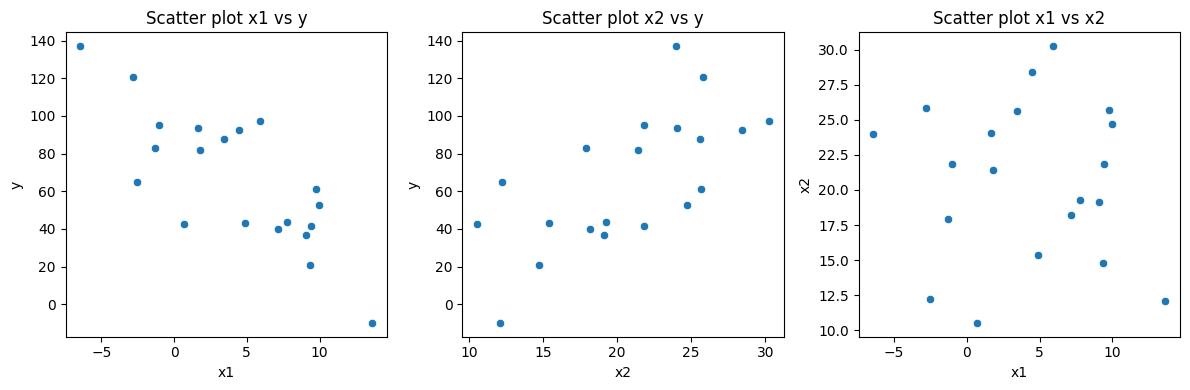


Коэффициенты корреляции:
Корреляция между x1 и y: -0.7878
Корреляция между x2 и y: 0.6698
Корреляция между x1 и x2: -0.0750
Корреляция между x1, x2 и y достаточная, модель множественной регрессии может быть использована.
Корреляция между x1 и x2 допустимая, факторы можно оставить.


In [193]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)

# вывод о корректности использования модели множественной регрессии

# расчет коэффициентов корреляции

# вывод о необходимости устранения какого-либо фактора


# Построение диаграмм рассеяния
plt.figure(figsize=(12, 4))

# Диаграмма рассеяния x1 и y
plt.subplot(1, 3, 1)
sns.scatterplot(x='x1', y='y', data=df4)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Scatter plot x1 vs y')

# Диаграмма рассеяния x2 и y
plt.subplot(1, 3, 2)
sns.scatterplot(x='x2', y='y', data=df4)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Scatter plot x2 vs y')

# Диаграмма рассеяния x1 и x2
plt.subplot(1, 3, 3)
sns.scatterplot(x='x1', y='x2', data=df4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot x1 vs x2')

plt.tight_layout()
plt.show()


# Расчет коэффициентов корреляции
corr_x1_y = df4['x1'].corr(df4['y'])
corr_x2_y = df4['x2'].corr(df4['y'])
corr_x1_x2 = df4['x1'].corr(df4['x2'])

# Вывод коэффициентов корреляции
print("\nКоэффициенты корреляции:")
print(f"Корреляция между x1 и y: {corr_x1_y:.4f}")
print(f"Корреляция между x2 и y: {corr_x2_y:.4f}")
print(f"Корреляция между x1 и x2: {corr_x1_x2:.4f}")

# Вывод о корректности использования модели множественной регрессии
if abs(corr_x1_y) < 0.3 and abs(corr_x2_y) < 0.3:
    print("Корреляция между x1, x2 и y слабая, модель множественной регрессии может быть неэффективной.")
else:
    print("Корреляция между x1, x2 и y достаточная, модель множественной регрессии может быть использована.")
    
    
    # Вывод о необходимости устранения какого-либо фактора
if abs(corr_x1_x2) > 0.7:
    print("Корреляция между x1 и x2 высокая, рекомендуется устранить один из факторов.")
else:
    print("Корреляция между x1 и x2 допустимая, факторы можно оставить.")

In [194]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии

# Добавление константы (intercept) для модели регрессии
X = sm.add_constant(df4[['x1', 'x2']])
y = df4['y']

# Построение модели регрессии
model = sm.OLS(y, X).fit()

const = model.params['const']  # Коэффициент для y
x1 = model.params['x1']  # Коэффициент для X1
x2 = model.params['x2']  # Коэффициент для X2


Стандартизированные коэффициенты регрессии:
Интерсепт: 6.7221
Коэффициент x1: -4.9174
Коэффициент x2: 3.8927


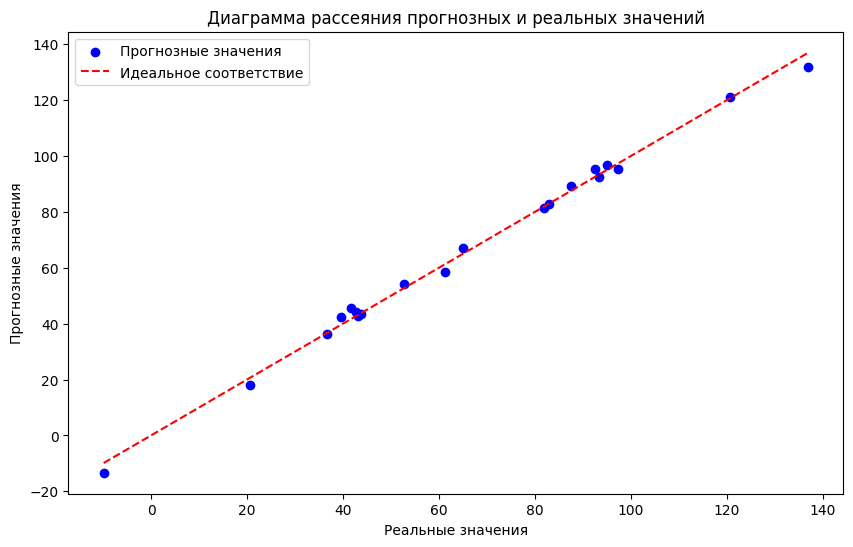

In [195]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике

# Вывод коэффициентов модели
print("Стандартизированные коэффициенты регрессии:")
print(f"Интерсепт: {const:.4f}")
print(f"Коэффициент x1: {x1:.4f}")
print(f"Коэффициент x2: {x2:.4f}")

# Построение прогнозных значений
y_pred = model.predict(X)

# Построение диаграммы рассеяния прогнозных и реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Прогнозные значения')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Идеальное соответствие')
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения')
plt.title('Диаграмма рассеяния прогнозных и реальных значений')
plt.legend()
plt.show()

In [196]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции

# расчет F-критерия

# вывод о статистической значимости уравнения в целом


# Расчет индекса множественной корреляции (R)
R = model.rsquared**0.5
print(f"Индекс множественной корреляции (R): {R:.4f}")

# Расчет F-критерия
F_statistic = model.fvalue
p_value_F = model.f_pvalue
print(f"F-критерий: {F_statistic:.4f}")
print(f"p-значение F-критерия: {p_value_F:.4f}")

# Вывод о статистической значимости уравнения в целом

if p_value_F < ALPHA:
    print(f"Уравнение регрессии статистически значимо в целом (p-значение < {ALPHA})")
else:
    print(f"Уравнение регрессии не статистически значимо в целом (p-значение >= {ALPHA})")

Индекс множественной корреляции (R): 0.9979
F-критерий: 1992.6978
p-значение F-критерия: 0.0000
Уравнение регрессии статистически значимо в целом (p-значение < 0.05)


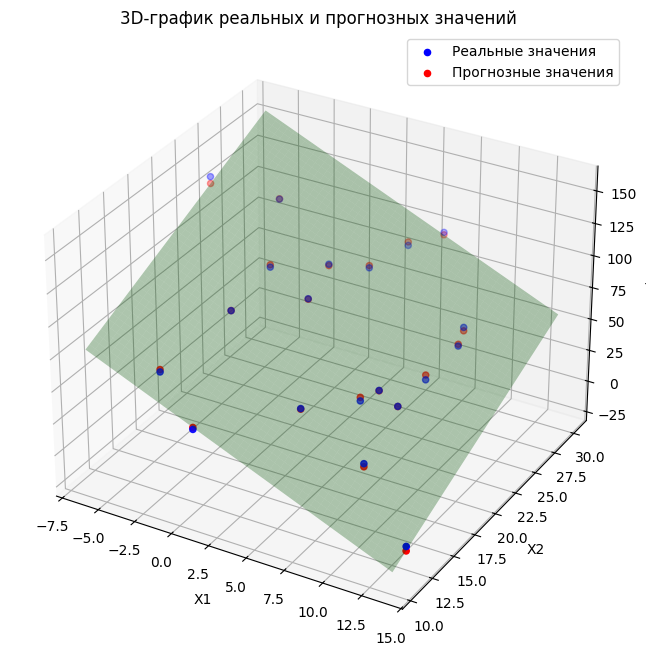

In [199]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике

# Создание 3D-графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Реальные значения
ax.scatter(df4['x1'], df4['x2'], df4['y'], color='blue', label='Реальные значения')

# Прогнозные значения
ax.scatter(df4['x1'], df4['x2'], y_pred, color='red', label='Прогнозные значения')

# Построение плоскости регрессии
xx, yy = np.meshgrid(np.linspace(df4['x1'].min(), df4['x1'].max(), 100),
                     np.linspace(df4['x2'].min(), df4['x2'].max(), 100))
z = const + x1 * xx + x2 * yy
ax.plot_surface(xx, yy, z, alpha=0.3, color='green')

# Настройка осей и легенды
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

# Показ графика
plt.title('3D-график реальных и прогнозных значений')
plt.show()